In [6]:
#Import required libraries

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [32]:
## Logistic Regression Training & Evaluation

# Load training and test features
X_train = pd.read_csv("../data/X_train_cleaned.csv")
X_test = pd.read_csv("../data/X_test_cleaned.csv")

# Load training and test labels
y_train = pd.read_csv("../data/y_train_cleaned.csv").squeeze()
y_test = pd.read_csv("../data/y_test_cleaned.csv").squeeze()

In [34]:
# Initialize and Train the Model

logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [38]:
y_pred = logreg_model.predict(X_test)

print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy Score: 0.6909069910686788

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.73      0.73     14573
           1       0.65      0.64      0.65     11403

    accuracy                           0.69     25976
   macro avg       0.69      0.69      0.69     25976
weighted avg       0.69      0.69      0.69     25976


Confusion Matrix:
 [[10619  3954]
 [ 4075  7328]]


In [40]:
coeffs = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logreg_model.coef_[0]
}).sort_values(by="Coefficient", key=abs, ascending=False)

print(coeffs.head(10))  # Top 10 most influential features

                            Feature  Coefficient
30          Service Rating Variance     4.067497
23   Type of Travel_Personal Travel    -2.702788
21  Customer Type_disloyal Customer    -2.376523
26                   Class_Eco Plus    -1.031381
18                    Gender_Female    -0.993652
19                      Gender_Male    -0.953804
25                        Class_Eco    -0.886224
22   Type of Travel_Business travel     0.755331
7                   Online boarding     0.487942
29                        Had Delay    -0.480393


In [42]:
# This confirms that:
# 	•	Service quality, delays, and customer type are the biggest drivers of satisfaction.
# 	•	These insights are useful for business recommendations.

In [46]:
# saving the model

import joblib
joblib.dump(logreg_model, "../models/Logistic_Regression.pkl")

['../models/Logistic_Regression.pkl']

In [48]:
## Train & Evaluate Decision Tree
from sklearn.tree import DecisionTreeClassifier

X_train = pd.read_csv("../data/X_train_cleaned.csv")
X_test = pd.read_csv("../data/X_test_cleaned.csv")
y_train = pd.read_csv("../data/y_train_cleaned.csv").squeeze()
y_test = pd.read_csv("../data/y_test_cleaned.csv").squeeze()

In [50]:
# Initialize and Train the Model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred_dt = dt_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_dt))
print("\n Classification Report:\n", classification_report(y_test, y_pred_dt))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

 Accuracy Score: 0.8859716661533723

 Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.91      0.90     14573
           1       0.89      0.85      0.87     11403

    accuracy                           0.89     25976
   macro avg       0.89      0.88      0.88     25976
weighted avg       0.89      0.89      0.89     25976


 Confusion Matrix:
 [[13322  1251]
 [ 1711  9692]]


In [54]:
feature_importances = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feature_importances.head(10))

                           Feature  Importance
7                  Online boarding    0.352369
2            Inflight wifi service    0.185834
23  Type of Travel_Personal Travel    0.131271
27             Total Service Score    0.068718
20    Customer Type_Loyal Customer    0.034117
30         Service Rating Variance    0.026829
0                              Age    0.018986
24                  Class_Business    0.018129
9           Inflight entertainment    0.017719
5                    Gate location    0.016095


In [56]:
joblib.dump(dt_model, "../models/Decision_Tree.pkl")

['../models/Decision_Tree.pkl']

In [60]:
## Train & Evaluate Random Forest
# Initialize and Train the Model
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(
    n_estimators=100,     # number of trees
    max_depth=None,       # trees grow fully unless pruned
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [62]:
# Predict and Evaluate

y_pred_rf = rf_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("\n Classification Report:\n", classification_report(y_test, y_pred_rf))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

 Accuracy Score: 0.9480289497998152

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.95      0.95     14573
           1       0.94      0.94      0.94     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976


 Confusion Matrix:
 [[13917   656]
 [  694 10709]]


In [64]:
#  Feature Importance

importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))

                           Feature  Importance
7                  Online boarding    0.136810
2            Inflight wifi service    0.117866
27             Total Service Score    0.116613
23  Type of Travel_Personal Travel    0.067330
22  Type of Travel_Business travel    0.063080
24                  Class_Business    0.053549
9           Inflight entertainment    0.035957
4           Ease of Online booking    0.035585
8                     Seat comfort    0.035077
25                       Class_Eco    0.032242


In [66]:
# Save the Model

joblib.dump(rf_model, "../models/Random_Forest.pkl")

['../models/Random_Forest.pkl']

In [68]:
## Train & Evaluate Gradient Boosting
# Initialize and Train the Model

from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(
    n_estimators=100,      # number of boosting rounds
    learning_rate=0.1,     # shrinkage rate
    max_depth=3,           # shallow trees for stability
    random_state=42
)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [70]:
y_pred_gb = gb_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_gb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))

 Accuracy Score: 0.9116492146596858

 Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92     14573
           1       0.91      0.88      0.90     11403

    accuracy                           0.91     25976
   macro avg       0.91      0.91      0.91     25976
weighted avg       0.91      0.91      0.91     25976


 Confusion Matrix:
 [[13593   980]
 [ 1315 10088]]


In [72]:
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print(importances.head(10))

                            Feature  Importance
7                   Online boarding    0.328705
2             Inflight wifi service    0.236879
22   Type of Travel_Business travel    0.120001
27              Total Service Score    0.112837
24                   Class_Business    0.101887
23   Type of Travel_Personal Travel    0.033152
20     Customer Type_Loyal Customer    0.021937
21  Customer Type_disloyal Customer    0.012278
30          Service Rating Variance    0.007055
13                  Checkin service    0.004699


In [74]:
joblib.dump(gb_model, "../models/Gradient_Boosting.pkl")

['../models/Gradient_Boosting.pkl']

In [76]:
## Train & Evaluate SVM with PCA Features

from sklearn.svm import SVC

#Load PCA Data
X_train = pd.read_csv("../data/train_pca_features.csv").drop(columns=["satisfaction"])
y_train = pd.read_csv("../data/train_pca_features.csv")["satisfaction"]

X_test = pd.read_csv("../data/test_pca_features.csv").drop(columns=["satisfaction"])
y_test = pd.read_csv("../data/test_pca_features.csv")["satisfaction"]

In [80]:
# Initialize and Train the Model

svm_model = SVC(kernel="rbf", C=1.0, gamma="scale", random_state=42)
svm_model.fit(X_train, y_train)

SVC(random_state=42)

In [83]:
y_pred_svm = svm_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_svm))
print("\n Classification Report:\n", classification_report(y_test, y_pred_svm))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

 Accuracy Score: 0.8042038805050816

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83     14573
           1       0.79      0.76      0.77     11403

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976


 Confusion Matrix:
 [[12205  2368]
 [ 2718  8685]]


In [85]:
joblib.dump(svm_model, "../models/SVM.pkl")

['../models/SVM.pkl']

In [89]:
## Train & Evaluate Naive Bayes

from sklearn.naive_bayes import GaussianNB

# Load PCA-Reduced Dataset
X_train = pd.read_csv("../data/train_pca_features.csv").drop(columns=["satisfaction"])
y_train = pd.read_csv("../data/train_pca_features.csv")["satisfaction"]

X_test = pd.read_csv("../data/test_pca_features.csv").drop(columns=["satisfaction"])
y_test = pd.read_csv("../data/test_pca_features.csv")["satisfaction"]

In [91]:
# Initialize and Train the Model

nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [93]:
y_pred_nb = nb_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_nb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_nb))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))

 Accuracy Score: 0.7784493378503233

 Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.78      0.80     14573
           1       0.74      0.77      0.75     11403

    accuracy                           0.78     25976
   macro avg       0.78      0.78      0.78     25976
weighted avg       0.78      0.78      0.78     25976


 Confusion Matrix:
 [[11411  3162]
 [ 2593  8810]]


In [95]:
## Train & Evaluate KNN

from sklearn.neighbors import KNeighborsClassifier

# Initialize and Train the Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [97]:
y_pred_knn = knn_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\n Classification Report:\n", classification_report(y_test, y_pred_knn))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))

 Accuracy Score: 0.8060902371419773

 Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82     14573
           1       0.76      0.82      0.79     11403

    accuracy                           0.81     25976
   macro avg       0.80      0.81      0.80     25976
weighted avg       0.81      0.81      0.81     25976


 Confusion Matrix:
 [[11627  2946]
 [ 2091  9312]]


In [99]:
joblib.dump(knn_model, "../models/KNN.pkl")

['../models/KNN.pkl']

In [101]:
##  Train & Evaluate MLP

from sklearn.neural_network import MLPClassifier

# Load Data
train_df = pd.read_csv("../data/train_full_features.csv")
test_df = pd.read_csv("../data/test_full_features.csv")

X_train = train_df.drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]

X_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

In [103]:
# Initialize and Train the Model

mlp_model = MLPClassifier(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=300, random_state=42)

In [105]:
# Predict and Evaluate

y_pred_mlp = mlp_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_mlp))
print("\n Classification Report:\n", classification_report(y_test, y_pred_mlp))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_mlp))

 Accuracy Score: 0.8022790267939637

 Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.83      0.82     14573
           1       0.78      0.77      0.77     11403

    accuracy                           0.80     25976
   macro avg       0.80      0.80      0.80     25976
weighted avg       0.80      0.80      0.80     25976


 Confusion Matrix:
 [[12083  2490]
 [ 2646  8757]]


In [107]:
joblib.dump(mlp_model, "../models/MLP.pkl")

['../models/MLP.pkl']

In [109]:
!pip install xgboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 6.9 MB/s eta 0:00:00a 0:00:01


In [16]:
## Train & Evaluate XGBoost

import xgboost as xgb

train_df = pd.read_csv("../data/train_full_features.csv")
test_df = pd.read_csv("../data/test_full_features.csv")

X_train = train_df.drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]

X_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

In [18]:
# Initialize and Train the Model

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [19:49:23] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, ...)

In [20]:
y_pred_xgb = xgb_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_xgb))
print("\n Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

 Accuracy Score: 0.9529565753002772

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.93      0.95     11403

    accuracy                           0.95     25976
   macro avg       0.95      0.95      0.95     25976
weighted avg       0.95      0.95      0.95     25976


 Confusion Matrix:
 [[14153   420]
 [  802 10601]]


In [22]:
# Save the list of feature column names (used during training)
import joblib
joblib.dump(X_train.columns.tolist(), "../models/feature_columns.pkl")

['../models/feature_columns.pkl']

In [24]:
joblib.dump(xgb_model, "../models/XGBoost.pkl")

['../models/XGBoost.pkl']

In [8]:
# Train & Evaluate Extra Trees Classifier

from sklearn.ensemble import ExtraTreesClassifier

train_df = pd.read_csv("../data/train_full_features.csv")
test_df = pd.read_csv("../data/test_full_features.csv")

X_train = train_df.drop(columns=["satisfaction"])
y_train = train_df["satisfaction"]

X_test = test_df.drop(columns=["satisfaction"])
y_test = test_df["satisfaction"]

In [10]:
# Train the Model
et_model = ExtraTreesClassifier(n_estimators=100, random_state=42)
et_model.fit(X_train, y_train)

ExtraTreesClassifier(random_state=42)

In [12]:
# Predict and Evaluate

y_pred_et = et_model.predict(X_test)

print(" Accuracy Score:", accuracy_score(y_test, y_pred_et))
print("\n Classification Report:\n", classification_report(y_test, y_pred_et))
print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred_et))

 Accuracy Score: 0.9572297505389591

 Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96     14573
           1       0.96      0.94      0.95     11403

    accuracy                           0.96     25976
   macro avg       0.96      0.96      0.96     25976
weighted avg       0.96      0.96      0.96     25976


 Confusion Matrix:
 [[14165   408]
 [  703 10700]]


In [127]:
joblib.dump(et_model, "../models/Extra_Trees.pkl")

['../models/Extra_Trees.pkl']

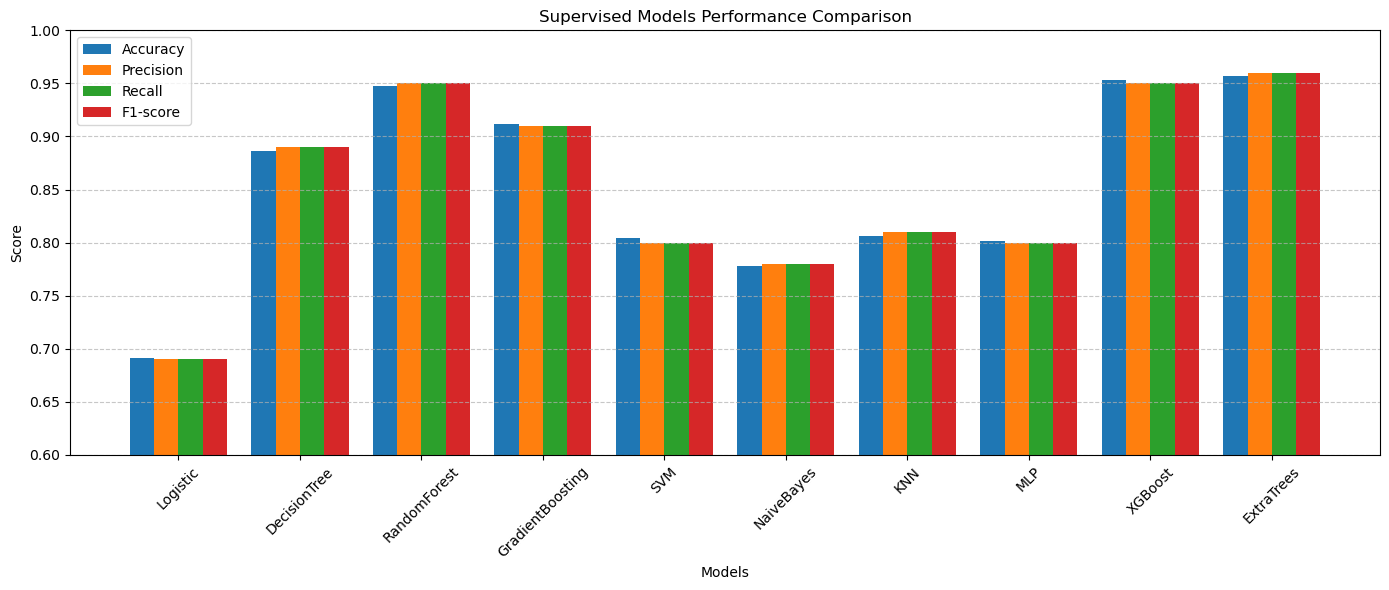

In [14]:
### Visualize Supervised Model Performance ###

import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Define the data
data = {
    'Model': [
        'Logistic', 'DecisionTree', 'RandomForest', 'GradientBoosting',
        'SVM', 'NaiveBayes', 'KNN', 'MLP', 'XGBoost', 'ExtraTrees'
    ],
    'Accuracy': [0.691, 0.886, 0.948, 0.912, 0.804, 0.778, 0.806, 0.802, 0.953, 0.957],
    'Precision': [0.69, 0.89, 0.95, 0.91, 0.80, 0.78, 0.81, 0.80, 0.95, 0.96],
    'Recall': [0.69, 0.89, 0.95, 0.91, 0.80, 0.78, 0.81, 0.80, 0.95, 0.96],
    'F1-score': [0.69, 0.89, 0.95, 0.91, 0.80, 0.78, 0.81, 0.80, 0.95, 0.96]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)

# Step 3: Set position and width
x = range(len(df))
bar_width = 0.2

# Step 4: Plot grouped bar chart
plt.figure(figsize=(14, 6))
plt.bar([p - 1.5*bar_width for p in x], df['Accuracy'], width=bar_width, label='Accuracy')
plt.bar([p - 0.5*bar_width for p in x], df['Precision'], width=bar_width, label='Precision')
plt.bar([p + 0.5*bar_width for p in x], df['Recall'], width=bar_width, label='Recall')
plt.bar([p + 1.5*bar_width for p in x], df['F1-score'], width=bar_width, label='F1-score')

# Step 5: Format chart
plt.xticks(x, df['Model'], rotation=45)
plt.ylim(0.6, 1.0)
plt.title('Supervised Models Performance Comparison')
plt.xlabel('Models')
plt.ylabel('Score')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# --- Summary of Findings ---

# Top Performers:
# 	•	Extra Trees achieved the highest accuracy (0.957) with excellent precision, recall, 
#         and F1-score, making it the most robust classifier overall.
# 	•	XGBoost and Random Forest also performed exceptionally well, both scoring above 0.94 on all metrics.	

# Moderate Performers:
# 	•	Gradient Boosting and Decision Tree provided strong results (accuracy above 0.89), 
#         balancing interpretability and performance.
# 	•	KNN, SVM, and MLP showed moderate accuracy (~0.80), but might benefit from hyperparameter 
#         tuning or feature scaling enhancements.

# Weaker Performers:
# 	•	Naive Bayes and Logistic Regression had the lowest scores. Logistic Regression is a strong baseline, 
#         but clearly outperformed by ensemble and tree-based methods.